# Lập trình cho Khoa học dữ liệu - Đồ án cuối kì

18120198 - Nguyễn Huỳnh Đại Lợi

18120212 - Huỳnh Long Nam

---

## Cài đặt thêm thư viện cần để sử dụng

In [1]:
!pip install openpyxl

## Import

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

## Thu thập dữ liệu

Dữ liệu được trích từ bộ dữ liệu [Mekong Infrastructure Tracker](https://www.stimson.org/project/mekong-infrastructure/). Bộ dữ liệu cho ta một cái nhìn về cơ sở hạ tầng cho năng lượng, giao thông, nguồn nước ở đồng bằng sông Mekong.

Trong bài này, chúng em sử dụng dữ liệu về Việt Nam thôi nên sẽ sử dụng filter có sẵn của nguồn để điều chỉnh chỉ lấy dữ liệu các cơ sở của Việt Nam. Dữ liệu được tải qua công cụ tracker của nguồn [ở đây](https://www.stimson.org/2020/mekong-infrastructure-tracker-tool/).

File `mekong-power-generation.xlsx` được đính kèm là file đã được tải về(lần cuối tải về là ngày 7/5/2021) và là dữ liệu sẽ được sử dụng.

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file

In [3]:
df=pd.read_excel("mekong-power-generation.xlsx")
df.head()

,Project Name,Subtype,Current Status,Capacity (MW),Year of Completion,undefined,Country list of Sponsor/Developer,Sponsor/Developer Company,Country list of Lender/Financier,Lender/Financier Company,...,Tributary,Latitude,Longitude,Proximity,Avg. Annual Output (MWh),undefined.2,Data Source,Announcement/More Information,Link,Latest Update
0,A Luoi,Hydro,Operational,170.0,2012.0,NaN,Vietnam,Central Region Hydropower JSC,NaN,NaN,...,Sekong,16.19762,107.1619,,,NaN,Vietnam Electricity,https://en.evn.com.vn/userfile/User/huongbtt/f...,https://wle-mekong.cgiar.org/construction-of-n...,03/31/2021
1,A Vuong,Hydro,Operational,210.0,2008.0,NaN,Vietnam,A Vuong Hydro Power JSC,NaN,NaN,...,Song Giang,15.79980,107.6171,,,NaN,Wikipedia,https://www.licogi166.vn/en/cong-trinh-thuy-di...,,03/31/2021
2,Amata,Oil,Operational,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Dong Nai,10.94710,106.9000,,,NaN,World Resources Institute,http://www.evn.com.vn/userfile/files/2017/3/An...,,
3,An Khanh - Bac Giang (Nhà máy Nhiệt điện An Kh...,Coal,Planned,650.0,2023.0,NaN,Vietnam,An Khanh - Bac Giang Thermal Power JSC,China,China Development Bank (CDB); Industrial and C...,...,Song Cau-Song Thuong-Song Luc Nam,21.23212,106.3596,"Actual location unknown, currently sited at lo...",5000000,NaN,Sponsor Website,http://danviet.vn/doanh-nghiep/nhiet-dien-an-k...,,
4,An Khanh I (Nhà máy nhiệt điện An Khánh I),Coal,Operational,120.0,2015.0,NaN,Vietnam,An Khanh Electricity JSC,China; Vietnam,"China Communications Bank; Bank of China, Chin...",...,Song Cau-Song Thuong-Song Luc Nam,21.59691,105.7666,,800000,NaN,AidData,https://vietnamnews.vn/economy/219017/an-khanh...,http://nhietdienankhanh.com.vn/gioi-thieu/gioi...,03/29/2021


### Kích thước dữ liệu

In [4]:
shape = df.shape
shape

(563, 26)

### Tìm hiểu về các thuộc tính của dữ liệu sử dụng

Dữ liệu gồm:
- 563 dòng tương ứng với 551 dự án năng lượng tại Việt Nam
- 26 cột, gồm các cột sau:

In [5]:
df.columns.to_list()

['Project Name',
 'Subtype',
 'Current Status',
 'Capacity (MW)',
 'Year of Completion',
 'undefined',
 'Country list of Sponsor/Developer',
 'Sponsor/Developer Company',
 'Country list of Lender/Financier',
 'Lender/Financier Company',
 'Country list of Construction/EPC',
 'Construction Company/EPC Participant',
 'Country',
 'Province/State',
 'District',
 'undefined.1',
 'Tributary',
 'Latitude',
 'Longitude',
 'Proximity',
 'Avg. Annual Output (MWh)',
 'undefined.2',
 'Data Source',
 'Announcement/More Information',
 'Link',
 'Latest Update']

Xét bộ dữ liệu tải về, các cột undefined/undefined.1/undefined.2 là các cột vô nghĩa(có thể là lỗi của nguồn dữ liệu), theo sự tìm hiểu của nhóm thì các cột có ý nghĩa mang nội dung sau:
- Project Name: tên dự án
- Subtype: loại năng lượng (than, thủy điện, mặt trời, sinh học,...)
- Current Status: tình trạng hiện tại (lên kế hoạch, đang thi công, đã bị hủy,...)
- Capacity (MW): công suất 
- Year of Completion: năm hoàn thành
- Country list of Sponsor/Developer: các quốc gia tài trợ, phát triển
- Sponsor/Developer Company: các công ty tài trợ, phát triển
- Country list of Lender/Financier: các quốc gia cho vay 
- Lender/Financier Company: các công ty cho vay 
- Country list of Construction/EPC*: các quốc gia tham gia vào xây dựng, tổng thầu xây dựng
- Construction Company/EPC Participant: công ty,tổng thầu xây dựng
- Country: dự án đặt tại quốc gia nào
- Province/State: dự án đặt tại tỉnh/bang nào
- District: dự án đặt tại huyện nào 
- Tributary: phụ lưu của dự án
- Latitude: vĩ độ
- Longitude: kinh độ
- Proximity: Phạm vi dự án
- Avg. Annual Output (MWh): sản lượng hàng năm
- Data Source: nguồn dữ liệu
- Announcement/More Information: Link thông tin dự án
- Link: Link thông tin dự án
- Latest Update: Lần cuối cập nhật


 `*EPC (viết tắt của từ Engineering, Procurement and Construction) có nghĩa là xây dựng một hợp đồng xây dựng mà nhà thầu thực hiện toàn bộ các công việc kỹ thuật, cung ứng vật tư, thiết bị đến việc thi công xây dựng công trình, hạng mục và chạy thử nghiệm bàn giao cho chủ đầu tư`

### Kiểm tra dữ liệu có bị lặp không

In [6]:
df[df.duplicated()]

,Project Name,Subtype,Current Status,Capacity (MW),Year of Completion,undefined,Country list of Sponsor/Developer,Sponsor/Developer Company,Country list of Lender/Financier,Lender/Financier Company,...,Tributary,Latitude,Longitude,Proximity,Avg. Annual Output (MWh),undefined.2,Data Source,Announcement/More Information,Link,Latest Update


Dữ liệu có vẻ không có dòng nào bị trùng với nhau

### Kiểm tra kiểu dữ liệu mỗi thuộc tính và xử lí các thuộc tính có vấn đề về kiểu dữ liệu

In [7]:
dtypes = df.dtypes
dtypes

Project Name                             object
Subtype                                  object
Current Status                           object
Capacity (MW)                           float64
Year of Completion                      float64
undefined                               float64
Country list of Sponsor/Developer        object
Sponsor/Developer Company                object
Country list of Lender/Financier         object
Lender/Financier Company                 object
Country list of Construction/EPC         object
Construction Company/EPC Participant     object
Country                                  object
Province/State                           object
District                                 object
undefined.1                             float64
Tributary                                object
Latitude                                float64
Longitude                               float64
Proximity                                object
Avg. Annual Output (MWh)                

Thuộc tính `Avg. Annual Output (MWh)` thuộc kiểu dữ liệu object trong khi phải là kiểu dữ liệu số

In [8]:
df['Avg. Annual Output (MWh)'].unique()

array([' ', '5000000', '800000', '694000', nan, '639000', '80000',
       '70000', '100000', '60000', '250000', '545000', '600000', '84000',
       '77000', '64800', '44000', '74000', '12500', '10000', '73904',
       '378000', '120000', '94710', '25000', '32000', '56300', '76000',
       '13000', '93200', '217642', '220500', '752510', '69000', '53000',
       '65000', '11400', '69100', '15780', '115000', '636800', '143000',
       '40000', '105000', '68000', '85800', '37000', '75000', '110000',
       '338000', '688000', '45000', '66003', '161000', '720000', '72820',
       '4000000', '1350000', '1930000', '3900000', '140000', '82000',
       '63650', '31860', '30000', '73000', '55000', '50800', '8160000',
       '280000', '334148', '132000', '1904000', '123329', '81135',
       '965000', '17500', '328000', '21000', '105870', '63500', '4690000',
       '22036', '67630', '28000', '54000', '79000', '46300', '19000',
       '18000', '12000', '59000', '56000', '127500', '48850', '146000',

Có vẻ trong bộ dữ liệu có pha lẫn giá trị khoảng trắng '$~~$' thay vì rỗng. Ta kiểm tra còn thuộc tính nào khác chứa chuỗi '$~~$' nữa không

In [9]:
space_count=df.isin([' ']).sum(axis=0)
space_count

Project Name                              0
Subtype                                   0
Current Status                            0
Capacity (MW)                             0
Year of Completion                        0
undefined                                 0
Country list of Sponsor/Developer         0
Sponsor/Developer Company                 0
Country list of Lender/Financier          0
Lender/Financier Company                  0
Country list of Construction/EPC          0
Construction Company/EPC Participant    387
Country                                   0
Province/State                            0
District                                  0
undefined.1                               0
Tributary                                 0
Latitude                                  0
Longitude                                 0
Proximity                               366
Avg. Annual Output (MWh)                311
undefined.2                               0
Data Source                     

---

## Tiền xử lý

Ta thực hiện tiền xử lý để thay các giá trị chuỗi khoảng trắng ' ' thành giá trị `nan` và chuyển cột `Avg. Annual Output (MWh)` thành dạng `float`

In [10]:
columns_that_contains_spaces=space_count[space_count>0].index
df.loc[:,columns_that_contains_spaces]=df.loc[:,columns_that_contains_spaces].replace({' ':np.nan})
df['Avg. Annual Output (MWh)']=df['Avg. Annual Output (MWh)'].astype(float)

Sau khi thay các khoảng trống ấy bằng giá trị `nan` thì đã không còn vấn đề khoảng trắng cũng như về kiểu dữ liệu

In [11]:
df.isin([' ']).sum(axis=0)

Project Name                            0
Subtype                                 0
Current Status                          0
Capacity (MW)                           0
Year of Completion                      0
undefined                               0
Country list of Sponsor/Developer       0
Sponsor/Developer Company               0
Country list of Lender/Financier        0
Lender/Financier Company                0
Country list of Construction/EPC        0
Construction Company/EPC Participant    0
Country                                 0
Province/State                          0
District                                0
undefined.1                             0
Tributary                               0
Latitude                                0
Longitude                               0
Proximity                               0
Avg. Annual Output (MWh)                0
undefined.2                             0
Data Source                             0
Announcement/More Information     

In [12]:
df.dtypes

Project Name                             object
Subtype                                  object
Current Status                           object
Capacity (MW)                           float64
Year of Completion                      float64
undefined                               float64
Country list of Sponsor/Developer        object
Sponsor/Developer Company                object
Country list of Lender/Financier         object
Lender/Financier Company                 object
Country list of Construction/EPC         object
Construction Company/EPC Participant     object
Country                                  object
Province/State                           object
District                                 object
undefined.1                             float64
Tributary                                object
Latitude                                float64
Longitude                               float64
Proximity                                object
Avg. Annual Output (MWh)                

Đối với các cột không phải kiểu dữ liệu số ta sẽ fillna bằng giá trị 'Unknown'

In [13]:
df.loc[:,df.columns[df.dtypes != np.number]]=df[df.columns[df.dtypes != np.number]].fillna('Unknown')

In [14]:
df.loc[:,df.columns[df.dtypes != np.number]]

,Project Name,Subtype,Current Status,Country list of Sponsor/Developer,Sponsor/Developer Company,Country list of Lender/Financier,Lender/Financier Company,Country list of Construction/EPC,Construction Company/EPC Participant,Country,Province/State,District,Tributary,Proximity,Data Source,Announcement/More Information,Link,Latest Update
0,A Luoi,Hydro,Operational,Vietnam,Central Region Hydropower JSC,Unknown,Unknown,Vietnam,VINAINCON,Vietnam,Thừa Thiên Huế,A Lưới,Sekong,Unknown,Vietnam Electricity,https://en.evn.com.vn/userfile/User/huongbtt/f...,https://wle-mekong.cgiar.org/construction-of-n...,03/31/2021
1,A Vuong,Hydro,Operational,Vietnam,A Vuong Hydro Power JSC,Unknown,Unknown,Japan; Vietnam,"Sumitomo, Licogi",Vietnam,Quảng Nam,Đông Giang,Song Giang,Unknown,Wikipedia,https://www.licogi166.vn/en/cong-trinh-thuy-di...,Unknown,03/31/2021
2,Amata,Oil,Operational,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Vietnam,Đồng Nai,Biên Hòa,Dong Nai,Unknown,World Resources Institute,http://www.evn.com.vn/userfile/files/2017/3/An...,Unknown,Unknown
3,An Khanh - Bac Giang (Nhà máy Nhiệt điện An Kh...,Coal,Planned,Vietnam,An Khanh - Bac Giang Thermal Power JSC,China,China Development Bank (CDB); Industrial and C...,Unknown,Unknown,Vietnam,Bắc Giang,Lục Nam,Song Cau-Song Thuong-Song Luc Nam,"Actual location unknown, currently sited at lo...",Sponsor Website,http://danviet.vn/doanh-nghiep/nhiet-dien-an-k...,Unknown,Unknown
4,An Khanh I (Nhà máy nhiệt điện An Khánh I),Coal,Operational,Vietnam,An Khanh Electricity JSC,China; Vietnam,"China Communications Bank; Bank of China, Chin...",China,China People Electricity and Gas Group,Vietnam,Thái Nguyên,Đại Từ,Song Cau-Song Thuong-Song Luc Nam,Unknown,AidData,https://vietnamnews.vn/economy/219017/an-khanh...,http://nhietdienankhanh.com.vn/gioi-thieu/gioi...,03/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,Yang Bac Wind Power Project,Wind,Planned,Vietnam,Tasco Energy JSC,Unknown,Unknown,Unknown,_x0008_,Vietnam,Gia Lai,Đăk Pơ,Song Da Rang-Song Ba,"Actual location unknown, currently sited at lo...",Sponsor Website,Unknown,http://tasco.com.vn/dau-tu-nang-luong-tai-tao/...,12/21/2020
559,Yen Dinh (Nhà máy Điện mặt trời Yên Định),Solar,Operational,Vietnam,Công ty CP Năng lượng Sông Lam Sơn La; Công ty...,Unknown,Unknown,South Korea,Unknown,Vietnam,Thanh Hóa,Yên Định,Ma mainstem,Unknown,Wikipedia,Unknown,https://vi.wikipedia.org/wiki/%C4%90i%E1%BB%87...,Unknown
560,ZaHung,Hydro,Operational,Vietnam,EVN and Za Hung JSC.,Unknown,Unknown,Unknown,Unknown,Vietnam,Quảng Nam,Đông Giang,Song Giang,Unknown,Wikipedia; UNFCC,https://cdm.unfccc.int/Projects/DB/BVQI1299431...,Unknown,Unknown
561,Đa Nhim Hydro,Hydro,Operational,Vietnam,"EVN, Da Nhim - Ham Thuan - Da Mi Hydropower JSC.",Japan,JICA,Japan,Hazama Corp,Vietnam,Lâm Đồng,Đơn Dương,Dong Nai,Unknown,Wikipedia,https://data.mendeley.com/datasets/ht9k5p3vdb/...,https://en.wikipedia.org/wiki/%C4%90a_Nhim_Hyd...,03/31/2021


Ngoài ra ta còn thấy giá trị chuỗi `_x0008_	` vô nghĩa ở cột `Construction Company/EPC Participant` tại dòng 558. Ta kiểm tra xem giá trị này còn xuất hiện ở đâu khác trong bộ dữ liệu không

In [15]:
strange_value=df.loc[558,'Construction Company/EPC Participant']
strange_count=df.isin([strange_value]).sum(axis=0)
strange_count

Project Name                            0
Subtype                                 0
Current Status                          0
Capacity (MW)                           0
Year of Completion                      0
undefined                               0
Country list of Sponsor/Developer       0
Sponsor/Developer Company               0
Country list of Lender/Financier        0
Lender/Financier Company                0
Country list of Construction/EPC        0
Construction Company/EPC Participant    1
Country                                 0
Province/State                          0
District                                0
undefined.1                             0
Tributary                               0
Latitude                                0
Longitude                               0
Proximity                               5
Avg. Annual Output (MWh)                0
undefined.2                             0
Data Source                             0
Announcement/More Information     

Rõ ràng ta cần xử lý trường hợp đặc biệt trên

In [16]:
columns_that_contains_strange_values=strange_count[strange_count>0].index
df.loc[:,columns_that_contains_strange_values]=df.loc[:,columns_that_contains_strange_values].replace({strange_value:np.nan})

---

## Quay lại bước khám phá dữ liệu 

### Khám phá các cột giá trị số

In [17]:
num_col_info_df = pd.DataFrame(columns=df.columns[df.dtypes == np.number], index=["missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"])
num_col_info_df.drop(columns=['undefined','undefined.1','undefined.2'],inplace=True)

In [18]:
df_num=df[num_col_info_df.columns]
num_col_info_df.loc['missing_ratio'] = (df_num.isna().sum()/len(df_num.index)*100).round(1)
num_col_info_df.loc['min'] = df_num.min().round(1)
num_col_info_df.loc['max'] = df_num.max().round(1)
num_col_info_df.loc['lower_quartile'] = df_num.quantile(0.25).round(1)
num_col_info_df.loc['upper_quartile'] = df_num.quantile(0.75).round(1)
num_col_info_df.loc['median'] = df_num.median().round(1)
num_col_info_df

,Capacity (MW),Year of Completion,Latitude,Longitude,Avg. Annual Output (MWh)
missing_ratio,2.8,11.0,0.0,0.0,61.1
min,0.2,1945.0,8.5,102.5,7000.0
lower_quartile,24.0,2012.0,11.5,105.7,60000.0
median,50.0,2018.0,14.0,107.0,80000.0
upper_quartile,269.5,2020.0,20.5,108.3,213321.0
max,9583.0,2031.0,23.2,109.3,12000000.0


Các giá trị thiếu tập trung chủ yếu ở cột `Avg. Annual Output (MWh)` nên ta có thể drop cột đó

In [19]:
cols_to_drop=['Avg. Annual Output (MWh)','undefined', 'undefined.1', 'undefined.2']

### Khám phá các cột giá trị không phải số

In [20]:
notnum_col_info_df = pd.DataFrame(columns=df.columns[df.dtypes != np.number], index=["missing_ratio", "num_values","value_counts", "value_ratios"])
df_notnum=df[notnum_col_info_df.columns]

In [21]:
multichoice_cols=['Country list of Sponsor/Developer', 'Sponsor/Developer Company' ,'Country list of Lender/Financier','Lender/Financier Company','Country list of Construction/EPC','Construction Company/EPC Participant','Data Source']

In [22]:
notnum_col_info_df.loc['missing_ratio'] = (df_notnum.replace('Unknown',np.nan).isna().sum()/len(df_notnum.index)*100).round(1)
for c in notnum_col_info_df.columns:
    di=dict()
    col_total_value=len(df_notnum[c].index)-df_notnum[c].isna().sum()
    if c in multichoice_cols:
        li=[]
        for i in df_notnum[c]:
            if type(i)==str:
                li+=i.split("; ")
        temp_set=set(li)
        notnum_col_info_df[c]['num_values']=len(temp_set)
        for i in temp_set:
            di[i]=li.count(i)
        notnum_col_info_df[c]['value_counts']=dict(sorted(di.items(), key=lambda x: x[1],reverse=True))
        total=np.sum(list(di.values()))
        for k, v in di.items():
            di[k] = round(v * 100.0 / total,1)
        notnum_col_info_df[c]['value_ratios']=dict(sorted(di.items(), key=lambda x: x[1],reverse=True))
    else:
        notnum_col_info_df[c]['num_values']=df_notnum[c].nunique(dropna=False)
        value_set=df_notnum[c].unique()
        notnum_col_info_df[c]['value_counts']=df_notnum[c].value_counts()
        for i in value_set:
            if type(i)==str:
                di[i]=((list(df_notnum[c]).count(i)/col_total_value)*100).round(1)
        notnum_col_info_df[c]['value_ratios']=dict(sorted(di.items(), key=lambda x: x[1],reverse=True))
    notnum_col_info_df

In [23]:
notnum_col_info_df

,Project Name,Subtype,Current Status,Country list of Sponsor/Developer,Sponsor/Developer Company,Country list of Lender/Financier,Lender/Financier Company,Country list of Construction/EPC,Construction Company/EPC Participant,Country,Province/State,District,Tributary,Proximity,Data Source,Announcement/More Information,Link,Latest Update
missing_ratio,0.0,0.0,1.1,7.1,6.2,82.2,82.4,73.9,73.2,0.0,0.0,0.0,1.1,70.3,1.2,16.9,70.3,72.1
num_values,561,8,6,27,387,22,105,17,133,1,60,228,61,3,38,400,136,17
value_counts,Cam An Bắc (Nhà máy điện mặt trời xã Cam An Bắ...,Hydro 246 Solar 126 Coal 81 W...,Operational 369 Planned ...,"{'Vietnam': 474, 'Unknown': 40, 'Thailand': 17...","{'EVN': 41, 'Unknown': 35, 'EVN (Vietnam)': 20...","{'Unknown': 463, 'Vietnam': 37, 'Japan': 27, '...","{'Unknown': 464, 'JICA': 9, 'ADB': 7, 'USTDA':...","{'Unknown': 416, 'Vietnam': 67, 'China': 39, '...","{'Unknown': 411, 'First Solar (Equipment)': 6,...","Vietnam 563 Name: Country, dtype: int64",Ninh Thuận 47 Bình Thuận 3...,Hướng Hóa 15 Thuận Nam 15 Mường La ...,Black-Li Xian 57 Viet...,Unknown ...,"{'Open Development Vietnam': 120, 'Sponsor Web...",Unknown ...,Unknown ...,Unknown 406 12/21/2020 51 03/31/2021...
value_ratios,{'Cam An Bắc (Nhà máy điện mặt trời xã Cam An ...,"{'Hydro': 43.7, 'Solar': 22.4, 'Coal': 14.4, '...","{'Operational': 65.5, 'Planned': 19.9, 'Under ...","{'Vietnam': 75.7, 'Unknown': 6.4, 'Thailand': ...","{'EVN': 7.0, 'Unknown': 6.0, 'EVN (Vietnam)': ...","{'Unknown': 77.2, 'Vietnam': 6.2, 'Japan': 4.5...","{'Unknown': 76.9, 'JICA': 1.5, 'ADB': 1.2, 'US...","{'Unknown': 69.9, 'Vietnam': 11.3, 'China': 6....","{'Unknown': 72.1, 'First Solar (Equipment)': 1...",{'Vietnam': 100.0},"{'Ninh Thuận': 8.3, 'Bình Thuận': 5.5, 'Sơn La...","{'Thuận Nam': 2.7, 'Mường La': 2.7, 'Hướng Hóa...","{'Black-Li Xian': 10.1, 'Vietnam Mekong Delta'...","{'Unknown': 70.1, 'Actual location unknown, cu...","{'Open Development Vietnam': 21.2, 'Sponsor We...","{'Unknown': 16.6, 'http://www.evn.com.vn/userf...","{'Unknown': 70.3, 'https://en.evn.com.vn/userf...","{'Unknown': 72.1, '12/21/2020': 9.1, '03/31/20..."


- Các cột `Country list of Lender/Financier`, `Lender/Financier Company`, `Country list of Construction/EPC`, `Construction Company/EPC Participant` thiếu rất trầm trọng
- Ta không cần quan tâm các cột `Data Source`, `Announcement/More Information`, `Link`, `Latest Update`
- Cột `Proximity` đa phần là các giá trị `Actual location unknown, currently sited at locality in link/announcement` hay vô nghĩa


***Ta sẽ drop tất cả các cột nêu trên***


In [24]:
cols_to_drop+=['Country list of Lender/Financier','Lender/Financier Company','Country list of Construction/EPC','Construction Company/EPC Participant','Data Source','Announcement/More Information', 'Link', 'Latest Update','Proximity']

---

## Quay lại bước tiền xử lý

Ta drop hết các cột đã chọn và tách riêng thống kê về các cột có giá trị multiple values.

Ngoài ra ta còn phát hiện cột `Sponsor/Developer Company` có 3 giá trị `EVN`, `EVN (Vietnam)`, `Vietnam Electricity (EVN)` thực tế là 1 nên ta sẽ gộp 3 giá trị trên lại.



In [25]:
df.drop(columns=cols_to_drop,inplace=True)

In [26]:
sponsor_developer_countries=pd.DataFrame(notnum_col_info_df.loc['value_counts','Country list of Sponsor/Developer'].items(), columns=['Country','Counts']) 
sponsor_developer_companies=pd.DataFrame(notnum_col_info_df.loc['value_counts','Sponsor/Developer Company'].items(), columns=['Company','Counts'])
sponsor_developer_companies.loc[0,'Counts'] = sponsor_developer_companies.loc[0,'Counts']+sponsor_developer_companies.loc[2,'Counts']+sponsor_developer_companies.loc[3,'Counts']
sponsor_developer_companies.drop(index=[2,3],inplace=True)
sponsor_developer_countries.to_csv('sponsor_developer_countries.csv',index=False)
sponsor_developer_companies.to_csv('sponsor_developer_companies.csv',index=False)




---

## Đặt câu hỏi 

Sau khi khám phá dữ liệu, ta đã hiểu hơn về dữ liệu. Bây giờ, ta sẽ thử trả lời một số câu hỏi bằng dữ liệu trên.

**Một câu hỏi có thể có là:** Đất nước/Công ty nào tham gia phát triển nhiều dự án nhất ở Việt Nam, phân bố các dự án trên địa lý Việt Nam,khả năng ản sinh điện dựa trên lưu vực, tình hình hoạt động hiện tại và tương lai của ngành năng lượng Việt Nam, phân bố các dạng năng lượng hiện tại và trong tương lai...?



---

## Phân tích dữ liệu

Ta tìm hiểu xem đất nước/công ty nào đã tích cực tham gia phát triển hệ thống năng lượng của Việt Nam

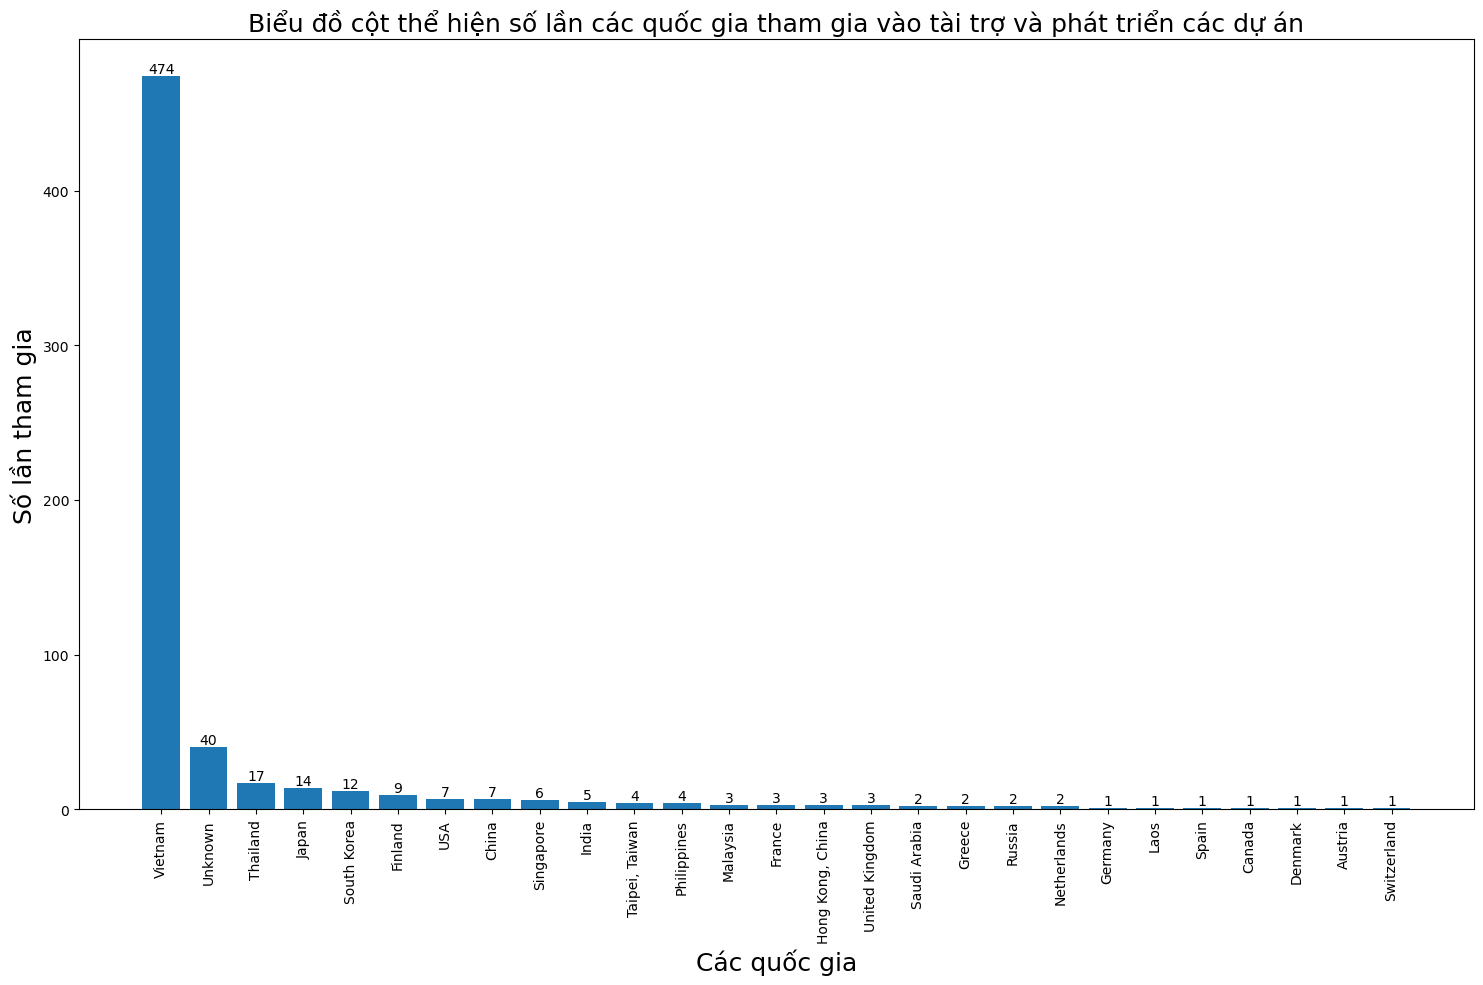

In [27]:
fig, ax = plt.subplots(figsize=(18,10))
p=ax.bar(sponsor_developer_countries['Country'],sponsor_developer_countries['Counts'])
ax.xaxis.set_tick_params(rotation=90)
ax.bar_label(p)
ax.set_title('Biểu đồ cột thể hiện số lần các quốc gia tham gia vào tài trợ và phát triển các dự án',fontsize=18)
ax.set_xlabel('Các quốc gia',fontsize=18)
ax.set_ylabel('Số lần tham gia',fontsize=18)
plt.show()


Do có quá nhiều công ty đã tham gia phát triển hệ thống năng lượng ở Việt Nam nên ta sẽ chỉ quan tâm các công ty có sự tham gia nhiều nhất

In [28]:
def adjust_company_name(x):
    if(len(x)>50):
        return x[:50]+'...'
    else:
        return x
sponsor_developer_companies['Company']=sponsor_developer_companies['Company'].apply(adjust_company_name)

In [29]:
tmp_df=sponsor_developer_companies[:5]
tmp_df=tmp_df.append({'Company':'Others','Counts':sponsor_developer_companies[4:]['Counts'].sum()},ignore_index=True)
tmp_df

,Company,Counts
0,EVN,69
1,Unknown,35
2,Công ty cổ phần Thiên Tân Solar Ninh Thuận – t...,6
3,Cty CP năng lượng Sông Lam Sơn La,4
4,Công ty cổ phần Super Wind Energy Công Lý Sóc ...,3
5,Others,470


Số công ty thuộc `Others`

In [30]:
sponsor_developer_companies.shape[0]-5

380

In [31]:

tmp_df['Company'].apply(adjust_company_name)

0                                                  EVN
1                                              Unknown
2    Công ty cổ phần Thiên Tân Solar Ninh Thuận – t...
3                    Cty CP năng lượng Sông Lam Sơn La
4    Công ty cổ phần Super Wind Energy Công Lý Sóc ...
5                                               Others
Name: Company, dtype: object

<ipython-input-32-aee9398092a6>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tmp_df['Company'],rotation=45, ha='right')


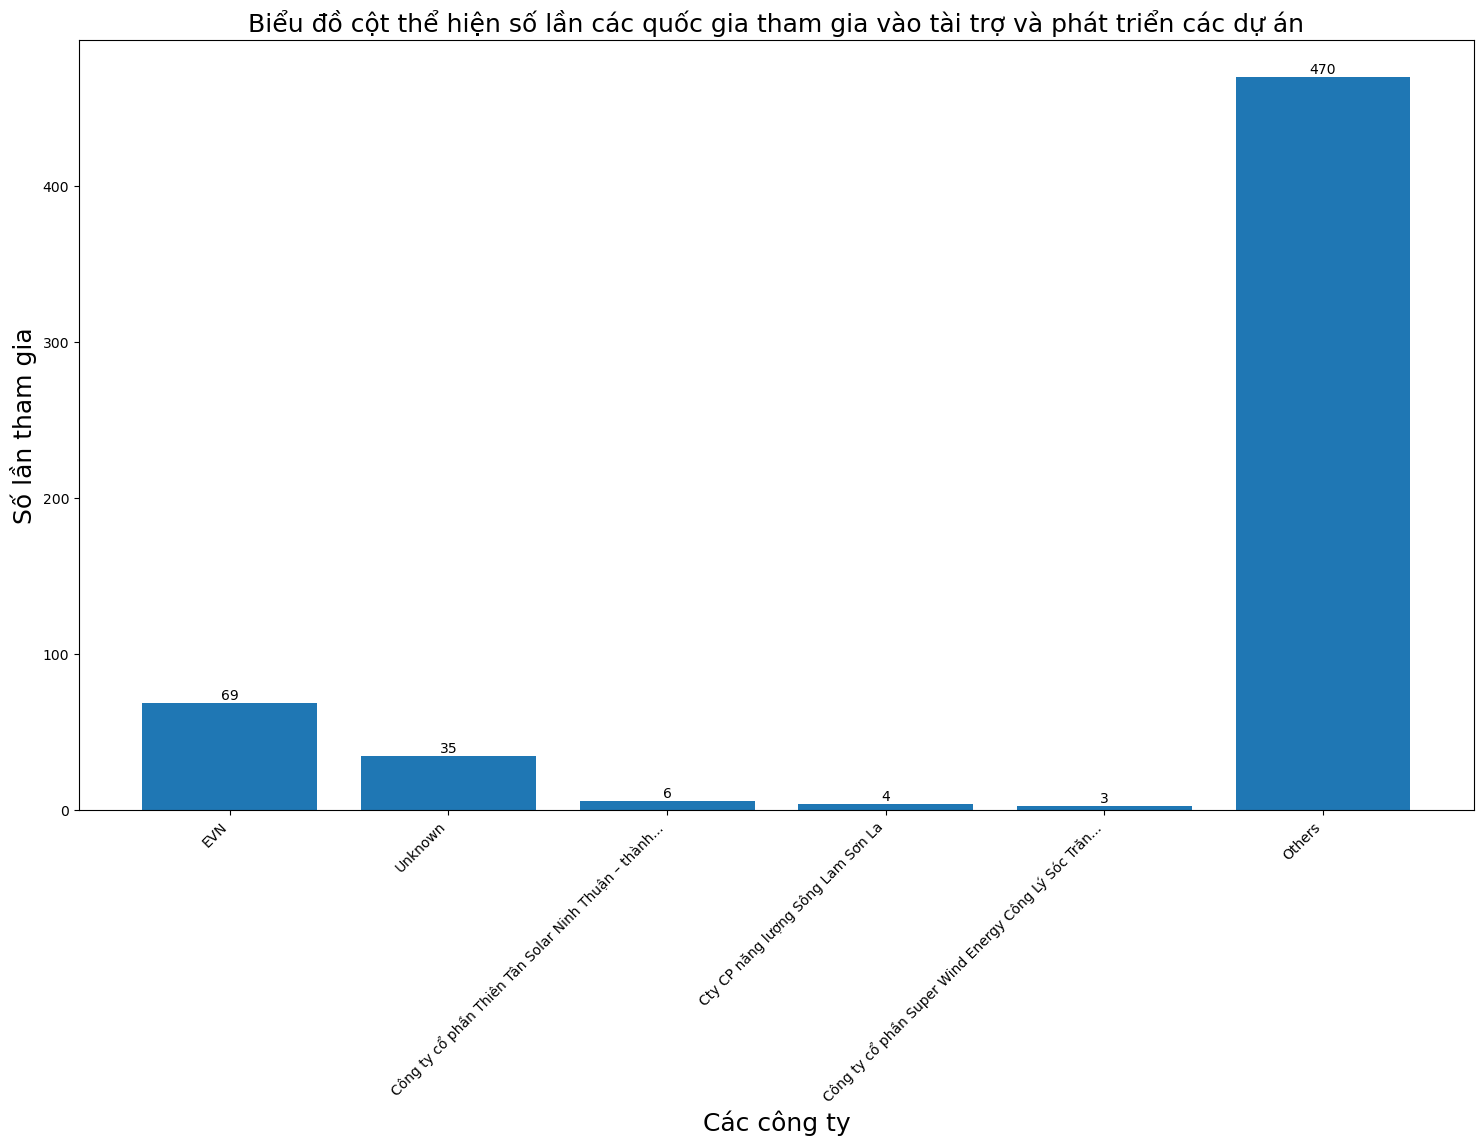

In [32]:
fig, ax = plt.subplots(figsize=(18,10))
p=ax.bar(tmp_df['Company'],tmp_df['Counts'])
ax.xaxis.set_tick_params(rotation=45)
ax.set_xticklabels(tmp_df['Company'],rotation=45, ha='right')
ax.bar_label(p)
ax.set_title('Biểu đồ cột thể hiện số lần các quốc gia tham gia vào tài trợ và phát triển các dự án',fontsize=18)
ax.set_xlabel('Các công ty',fontsize=18)
ax.set_ylabel('Số lần tham gia',fontsize=18)
plt.show()

Ta có thể thấy các nước trên thế giới rất hỗ trợ chúng ta về sự phát triển các dự án ngành năng lượng, trong đó nước ta được các nước Thái Lan, Nhật Bản, Hàn Quốc, Phần Lan, Mỹ, Trung Quốc và Ấn Độ hỗ trợ nhiều dự án nhất. Nhưng ta vẫn cần phải xét về mặt giá trị của các dự án đó, mà ta không có giá trị cụ thể về hiện kim, hiện vật hay nhân lực nên ta sẽ xem nước nào đã tham gia nhiều dự án lớn nhất ở nước ta dựa trên giá trị cột `Capacity`

In [33]:
new_df=pd.DataFrame(columns=df.columns)
for i in range(df.shape[0]):
    tmp=df.iloc[i].copy()
    l=tmp['Country list of Sponsor/Developer'].split('; ')
    for x in l:
        tmp['Country list of Sponsor/Developer']=x
        new_df=new_df.append(tmp,ignore_index=True)

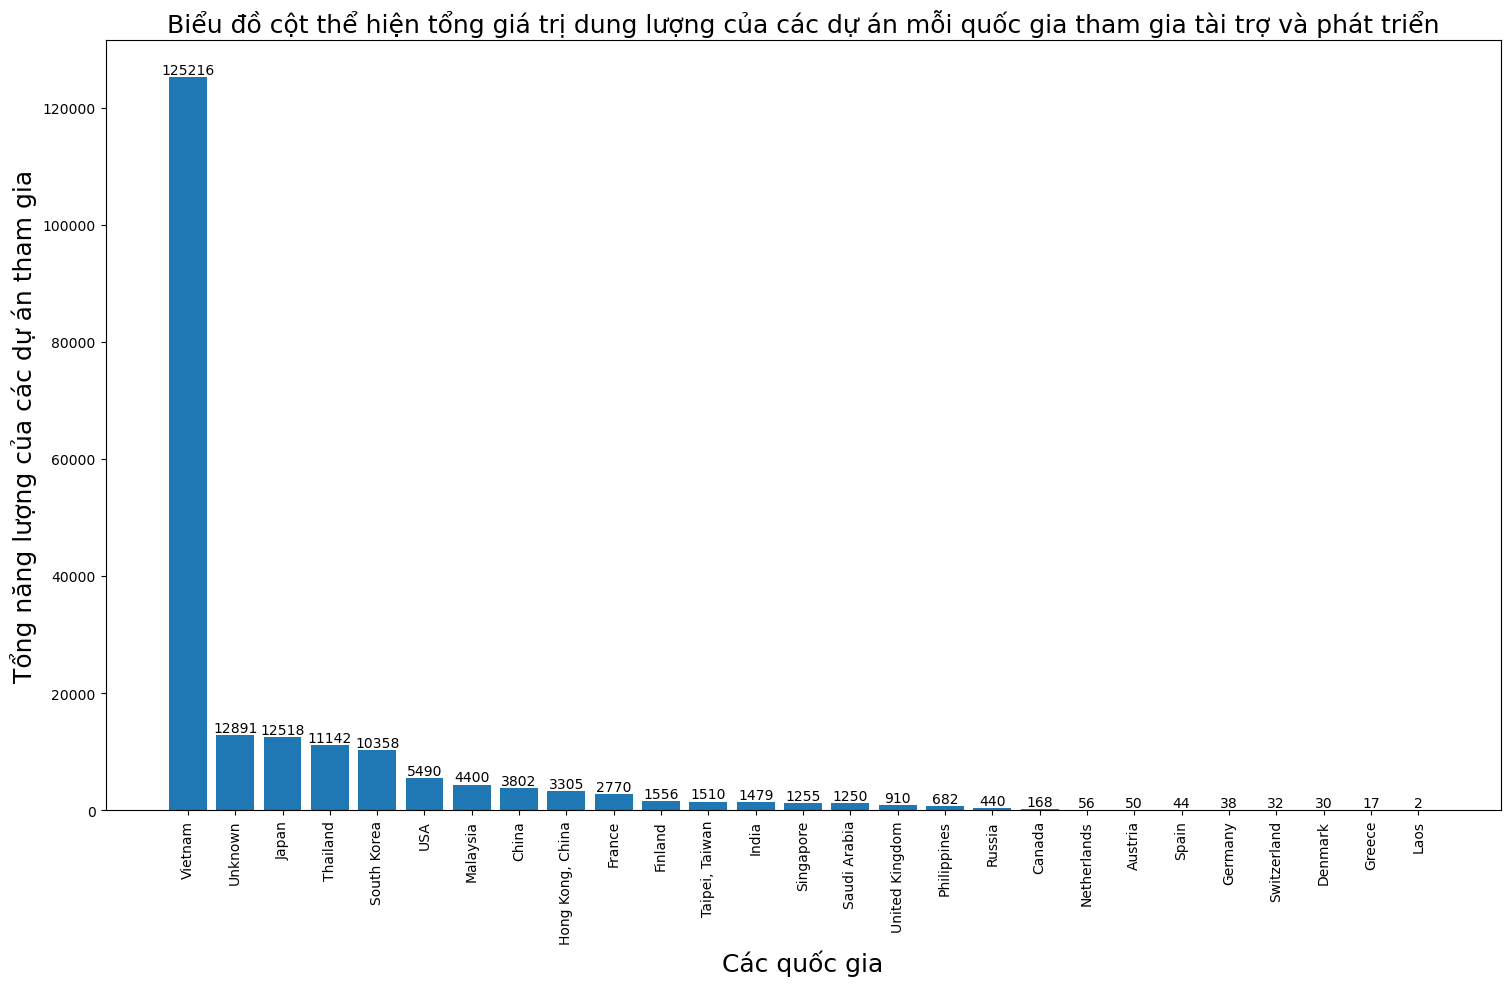

In [34]:
country_value=new_df.groupby(['Country list of Sponsor/Developer']).sum()['Capacity (MW)'].sort_values(ascending=False).round(0)

fig, ax = plt.subplots(figsize=(18,10))
p=ax.bar(country_value.index,country_value.values)
ax.xaxis.set_tick_params(rotation=90)
ax.bar_label(p)
ax.set_title('Biểu đồ cột thể hiện tổng giá trị dung lượng của các dự án mỗi quốc gia tham gia tài trợ và phát triển',fontsize=18)
ax.set_xlabel('Các quốc gia',fontsize=18)
ax.set_ylabel('Tổng năng lượng của các dự án tham gia',fontsize=18)
plt.show()

Như thấy ở trên những quốc gia có hỗ trợ nhiều nhất với nước ta là Nhật Bản, Thái Lan, Hàn Quốc, Mỹ, Malaysia và Trung Quốc. Nhưng tỷ lệ dự án đang hoạt động là bao nhiêu?

In [35]:
pivot_table = pd.pivot_table(new_df, values='Capacity (MW)', index=['Current Status'],columns=['Country list of Sponsor/Developer'], aggfunc=np.sum,fill_value=0)
pivot_table = pivot_table / pivot_table.sum(axis=0)
pivot_table = pivot_table.T
pivot_table.reset_index(inplace=True)
round(pivot_table,1)

Current Status,Country list of Sponsor/Developer,Cancelled,Operational,Planned,Postponed,Under Construction,Unknown
0,Austria,0.0,1.0,0.0,0.0,0.0,0.0
1,Canada,0.0,1.0,0.0,0.0,0.0,0.0
2,China,0.0,1.0,0.0,0.0,0.0,0.0
3,Denmark,0.0,1.0,0.0,0.0,0.0,0.0
4,Finland,0.0,0.1,0.8,0.0,0.1,0.0
5,France,0.0,0.3,0.7,0.0,0.0,0.0
6,Germany,0.0,0.0,1.0,0.0,0.0,0.0
7,Greece,0.0,1.0,0.0,0.0,0.0,0.0
8,"Hong Kong, China",0.0,0.0,0.4,0.0,0.6,0.0
9,India,0.0,0.0,0.9,0.0,0.0,0.0


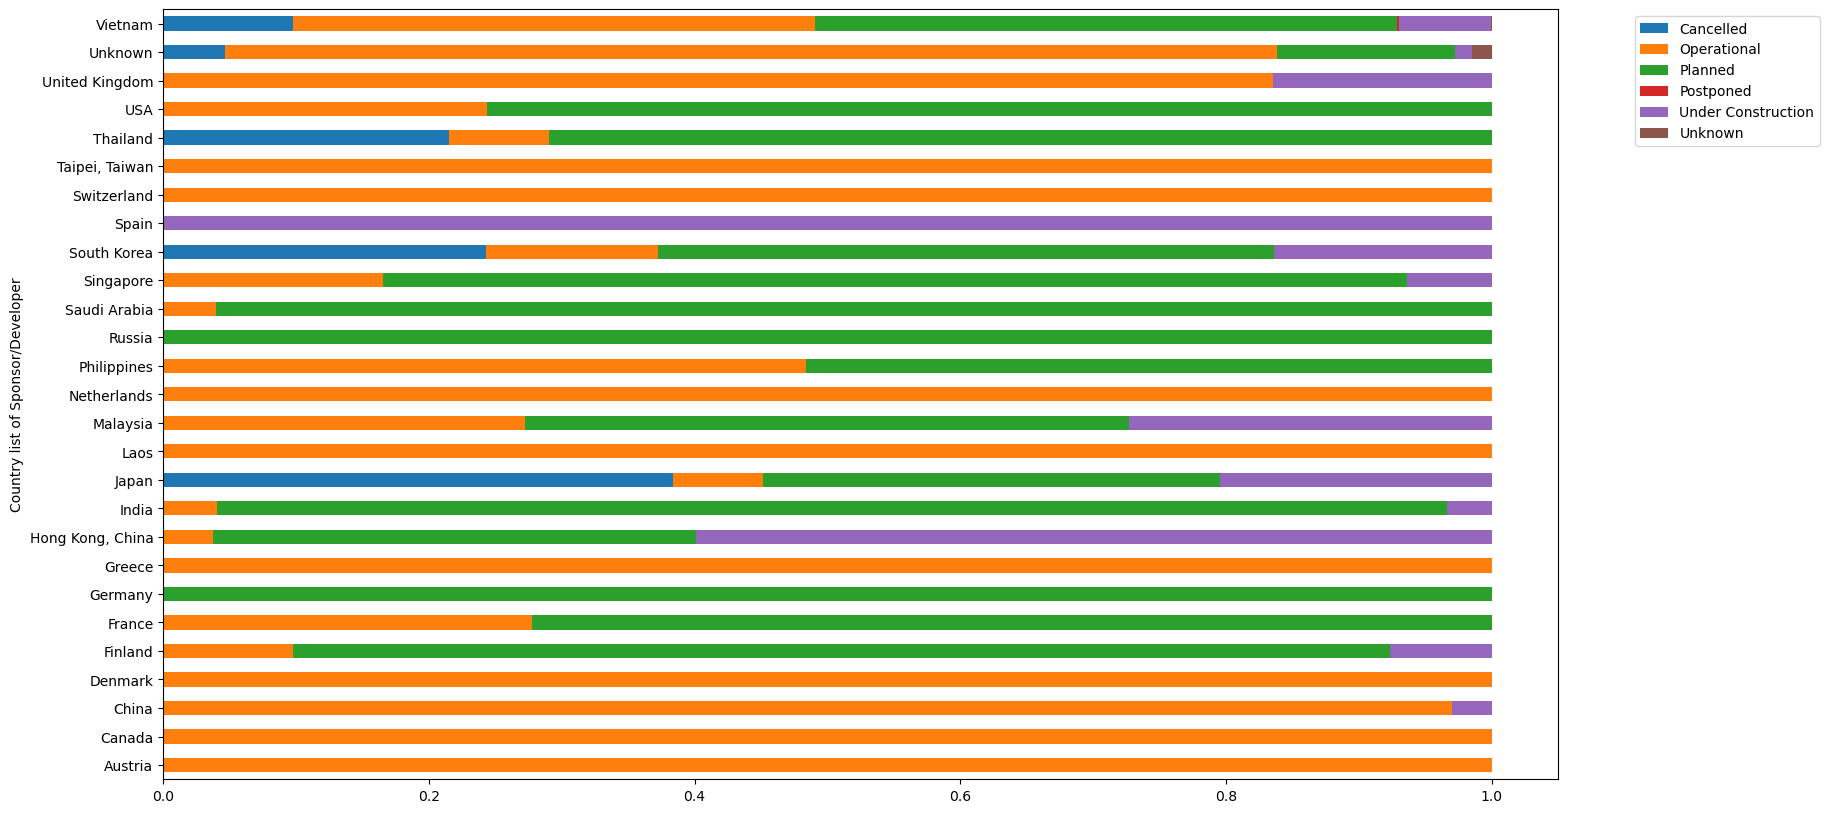

In [36]:
fig, ax = plt.subplots(figsize=(18,10))
pivot_table.plot( 
    x = 'Country list of Sponsor/Developer', 
    kind = 'barh', 
    stacked = True, 
    mark_right = True,ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Như biểu đồ ở trên ta có thể thấy một số nước như Đức và Nga hiện chỉ mới lên kế hoạch hợp tác với nước ta, trong khi các dự án có sự hỗ trợ của Đan Mạch, Canada, Úc, Đài Loan, Thụy Sĩ, Hy Lạp thì tất cả đều đang hoạt động

Tiếp theo ta sẽ tìm hiểu về hiện tại của ngành năng lượng Việt Nam

In [129]:
active_now=df[df['Current Status']=='Operational']
in_future=df[(df['Current Status']=='Planned')|(df['Current Status']=='Under Construction')]

# Tỉ trọng điện

## Active

In [117]:
active_now=df[df['Current Status']=='Operational']

In [118]:
active_count=active_now.groupby('Subtype').count()['Project Name']

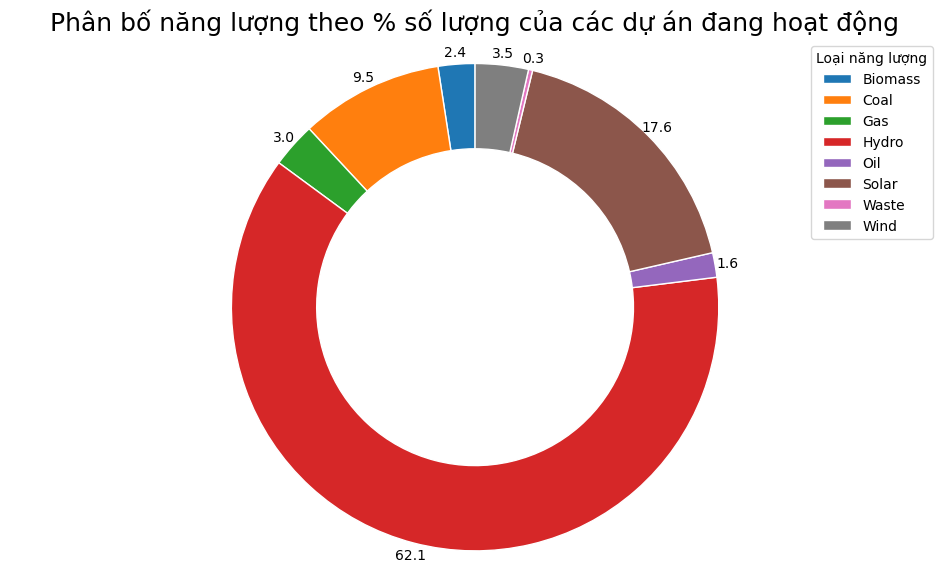

In [142]:
labels = active_count.index
sizes = active_count.values
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
size = 0.35
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(sizes,  labels=labels, autopct='%1.1f',startangle=90,labeldistance=None,pctdistance=1.05,wedgeprops=dict(width=size, edgecolor='w'))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels,title='Loại năng lượng')
ax1.set_title('Phân bố năng lượng theo % số lượng của các dự án đang hoạt động',fontsize=18)
plt.show()

In [151]:
active_capacity=active_now.groupby('Subtype').sum()['Capacity (MW)']
temp=(active_capacity/active_capacity.sum()*100).round(1)

array(['0.6', '34.7', '11.6', '27.9', '1.4', '22.1', '0.0', '1.7'],
      dtype='<U32')

In [163]:
np.array(temp.index)+'  '+temp.values.astype('str')

array(['Biomass  0.6', 'Coal  34.7', 'Gas  11.6', 'Hydro  27.9',
       'Oil  1.4', 'Solar  22.1', 'Waste  0.0', 'Wind  1.7'], dtype=object)

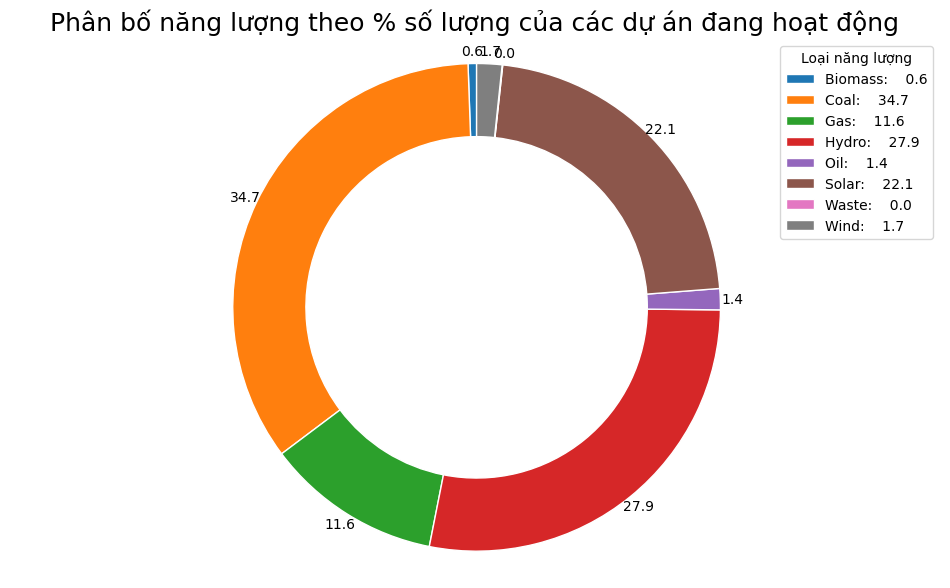

In [166]:
labels = active_capacity.index
sizes = active_capacity.values
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
size = 0.3
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(sizes,  labels=labels, autopct='%1.1f',startangle=90,labeldistance=None,pctdistance=1.05,wedgeprops=dict(width=size, edgecolor='w'))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(np.array(temp.index)+':    '+temp.values.astype('str'),title='Loại năng lượng')
ax1.set_title('Phân bố năng lượng theo % số lượng của các dự án đang hoạt động',fontsize=18)
plt.show()

## Plan and Under Construction

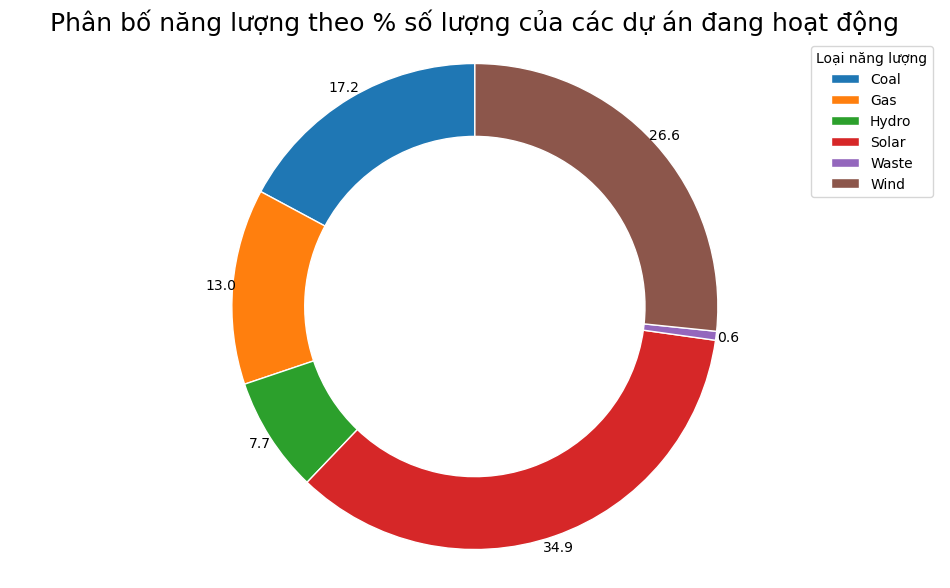

In [131]:
in_future=df[(df['Current Status']=='Planned')|(df['Current Status']=='Under Construction')]
in_future=in_future.groupby('Subtype').count()['Project Name']

labels = in_future.index
sizes = in_future.values
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
size = 0.3
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(sizes,  labels=labels, autopct='%1.1f',startangle=90,labeldistance=None,pctdistance=1.05,wedgeprops=dict(width=size, edgecolor='w'))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels,title='Loại năng lượng')
ax1.set_title('Phân bố năng lượng theo % số lượng của các dự án đang hoạt động',fontsize=18)
plt.show()

Nhận xét:

Các dự án trong tương lai sẽ dịch chuyển sang hướng năng lượng xanh đặc biệt là `Năng lượng mặt trời` và `Năng lượng gió`